In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
%matplotlib inline
from scipy.special import boxcox1p
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

In [97]:
df_train=pd.read_csv("train_fwYjLYX.csv")
print(df_train.shape)
print(df_train.isnull().sum())
print(df_train.head())
print(df_train['segment'].unique())
print(df_train['zone'].unique())
print(df_train['state'].unique())

(80402, 6)
application_date        0
segment                 0
branch_id           13504
state                   0
zone                13504
case_count              0
dtype: int64
  application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0
[1 2]
['EAST' 'NORTH' 'SOUTH' 'WEST' 'CENTRAL' nan]
['WEST BENGAL' 'DELHI' 'KARNATAKA' 'TAMIL NADU' 'UTTAR PRADESH' 'PUNJAB'
 'TELANGANA' 'ANDHRA PRADESH' 'MAHARASHTRA' 'ORISSA' 'GUJARAT' 'ASSAM'
 'JHARKHAND' 'UTTARAKHAND' 'KERALA' 'CHHATTISGARH' 'BIHAR' 'TRIPURA'
 'MADHYA PRADESH' 'HARYANA']


In [98]:
df_train.info()
print(df_train.loc[df_train['segment']==1].count())
print(df_train.loc[df_train['segment']==2].count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB
application_date    66898
segment             66898
branch_id           66898
state               66898
zone                66898
case_count          66898
dtype: int64
application_date    13504
segment             13504
branch_id               0
state               13504
zone                    0
case_count          13504
dtype: int64


In [99]:
df_seg_1=df_train.loc[df_train['segment']==1]
df_seg_2=df_train.loc[df_train['segment']==2]

In [100]:
df_seg_1['branch_id'].unique()

array([  1.,   3.,   5.,   7.,   8.,   9.,  10.,  11.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  29.,  34.,  35.,  36.,  42.,
        43.,  48.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  72.,  73.,  74.,  76.,  77.,  78.,  79.,  82.,  84.,  85.,
       100., 101., 103., 104., 105., 111., 117., 120., 121., 135., 136.,
       137., 147., 159., 165., 202., 207., 217., 248., 249., 250., 251.,
       254., 255., 257., 258., 259., 260., 261., 262., 263., 264., 265.,
       266., 267., 268., 269., 270., 271.])

In [101]:
#Stationarity Test
def test_stationarity(timeseries,cutoff = 0.01):
    #Determing rolling statistics
    rolmean = timeseries.rolling(4).mean()
    rolstd = timeseries.rolling(4).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    print(dfoutput)

In [102]:
#Calculation of Root Mean Square Error
def measure_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

In [103]:
df_seg_1.application_date=pd.to_datetime(df_seg_1.application_date,format="%Y-%m-%d")
print(df_seg_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66898 entries, 0 to 66897
Data columns (total 6 columns):
application_date    66898 non-null datetime64[ns]
segment             66898 non-null int64
branch_id           66898 non-null float64
state               66898 non-null object
zone                66898 non-null object
case_count          66898 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.6+ MB
None


C:\Users\HP\Miniconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [104]:
df_bran=df_seg_1[['application_date','branch_id','case_count']]

In [105]:
df_bran_1=df_bran[['application_date','case_count']].loc[df_bran['branch_id']==1]

In [106]:
df_bran_1

,application_date,case_count
0,2017-04-01,40.0
1,2017-04-03,5.0
2,2017-04-04,4.0
3,2017-04-05,113.0
4,2017-04-07,76.0
...,...,...
801,2019-07-01,169.0
802,2019-07-02,139.0
803,2019-07-03,165.0
804,2019-07-04,169.0


In [107]:
df_bran_1['weekday'] = df_bran_1['application_date'].dt.weekday
df_bran_1['year'] = df_bran_1['application_date'].dt.year
df_bran_1['month'] = df_bran_1['application_date'].dt.month
df_bran_1['day'] = df_bran_1['application_date'].dt.day

In [108]:
df_bran_1

,application_date,case_count,weekday,year,month,day
0,2017-04-01,40.0,5,2017,4,1
1,2017-04-03,5.0,0,2017,4,3
2,2017-04-04,4.0,1,2017,4,4
3,2017-04-05,113.0,2,2017,4,5
4,2017-04-07,76.0,4,2017,4,7
...,...,...,...,...,...,...
801,2019-07-01,169.0,0,2019,7,1
802,2019-07-02,139.0,1,2019,7,2
803,2019-07-03,165.0,2,2019,7,3
804,2019-07-04,169.0,3,2019,7,4


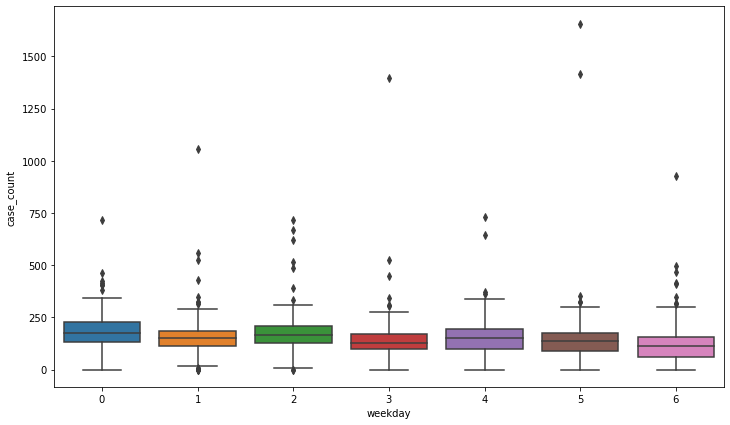

In [109]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.boxplot(x="weekday", y="case_count", data=df_bran_1)

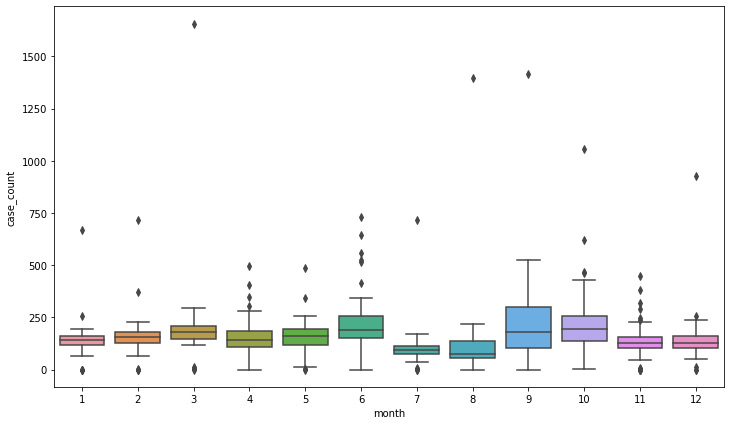

In [110]:
plt.figure(figsize=(12,7))
sns.boxplot(x="month", y="case_count", data=df_bran_1)

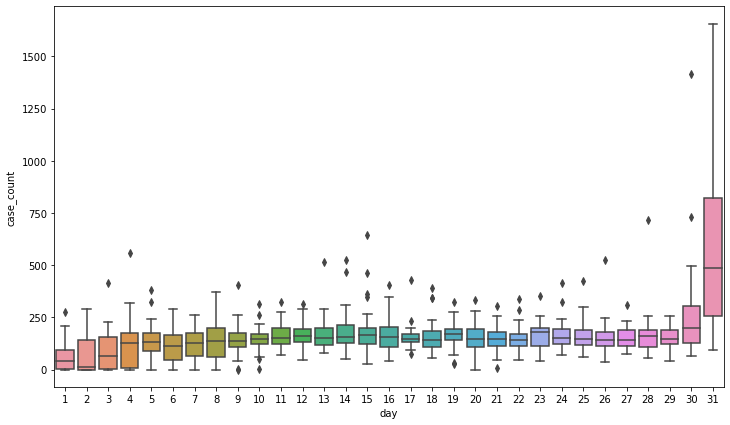

In [111]:
plt.figure(figsize=(12,7))
sns.boxplot(x="day", y="case_count", data=df_bran_1)

In [120]:
df_bran_all=df_bran[['application_date','case_count','branch_id']]
df_bran_all['weekday'] = df_bran_all['application_date'].dt.weekday
df_bran_all['year'] = df_bran_all['application_date'].dt.year
df_bran_all['month'] = df_bran_all['application_date'].dt.month
df_bran_all['day'] = df_bran_all['application_date'].dt.day

C:\Users\HP\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

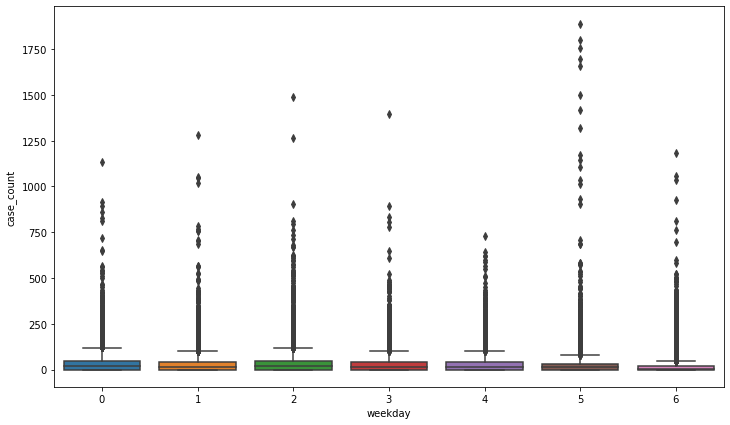

In [121]:
plt.figure(figsize=(12,7))
sns.boxplot(x="weekday", y="case_count", data=df_bran_all)

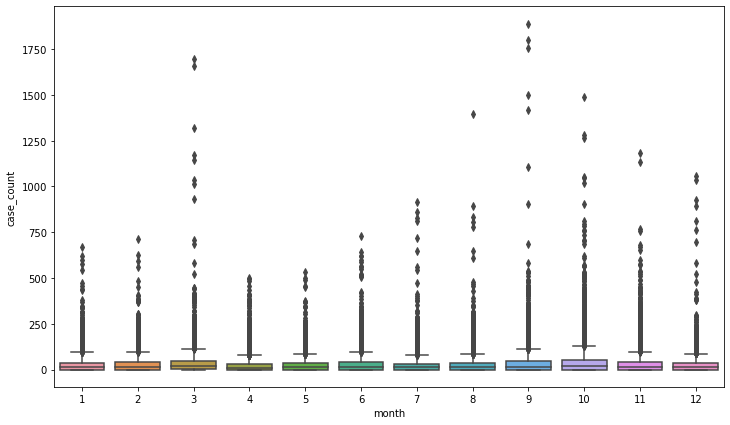

In [122]:
plt.figure(figsize=(12,7))
sns.boxplot(x="month", y="case_count", data=df_bran_all)

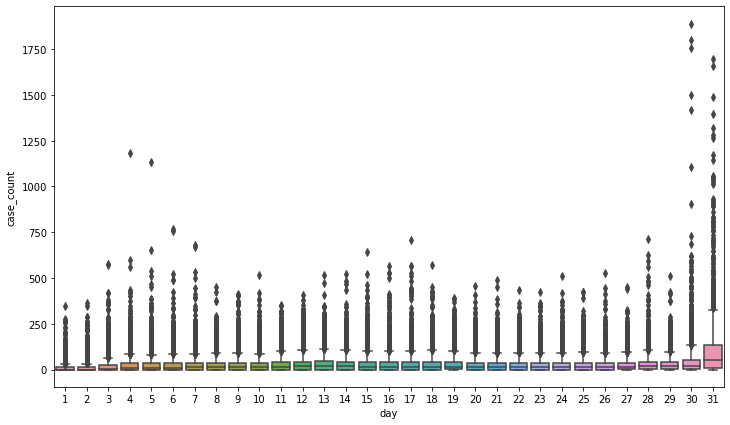

In [123]:
plt.figure(figsize=(12,7))
sns.boxplot(x="day", y="case_count", data=df_bran_all)

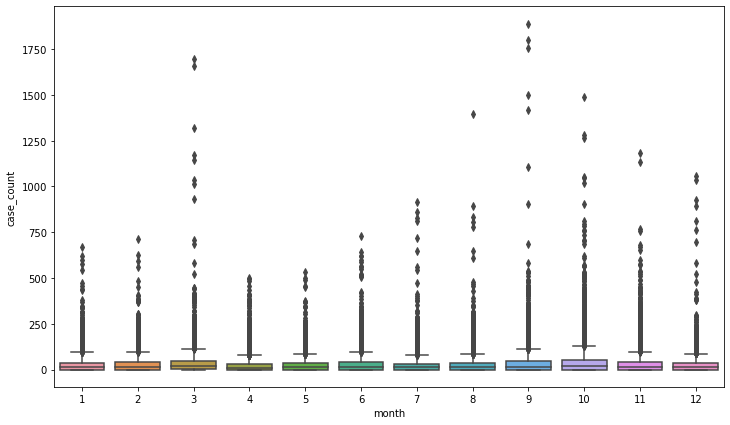

In [124]:
plt.figure(figsize=(12,7))
sns.boxplot(x="month", y="case_count", data=df_bran_all);

In [117]:
df_seg_1_piv=df_seg_1.pivot_table('case_count',index='application_date',columns='branch_id')

In [118]:
df_seg_1_piv

branch_id,1.0,3.0,5.0,7.0,8.0,9.0,10.0,11.0,13.0,14.0,...,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0
application_date,,,,,,,,,,,,,,,,,,,,,
2017-04-01,40.0,58.0,10.0,2.0,13.0,11.0,0.0,9.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-03,5.0,13.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-04,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-05,113.0,74.0,113.0,19.0,10.0,22.0,46.0,23.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-07,76.0,74.0,102.0,24.0,28.0,27.0,29.0,22.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,169.0,266.0,264.0,52.0,45.0,35.0,30.0,40.0,54.0,70.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,30.0,6.0
2019-07-02,139.0,220.0,164.0,87.0,33.0,34.0,53.0,47.0,50.0,64.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,17.0,3.0
2019-07-03,165.0,277.0,195.0,50.0,40.0,37.0,75.0,44.0,55.0,49.0,...,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,34.0,3.0


In [119]:
#Loop for multiple branch_id selection
col_list=df_seg_1_piv.columns.values
#for i in col_list:
    #print(i)
    #print(df_seg_2_test[i])
print(col_list)
print(col_list.shape)

[  1.   3.   5.   7.   8.   9.  10.  11.  13.  14.  15.  16.  17.  18.
  19.  20.  21.  29.  34.  35.  36.  42.  43.  48.  61.  62.  63.  64.
  65.  66.  67.  68.  69.  70.  72.  73.  74.  76.  77.  78.  79.  82.
  84.  85. 100. 101. 103. 104. 105. 111. 117. 120. 121. 135. 136. 137.
 147. 159. 165. 202. 207. 217. 248. 249. 250. 251. 254. 255. 257. 258.
 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270. 271.]
(83,)


In [159]:
df_mon_610=pd.DataFrame()
for i in range(6,10):
    df_mon_610=df_mon_610.append(df_bran_all.loc[(df_bran_all['month']==i)])

In [160]:
df_bran_all.columns

Index(['application_date', 'case_count', 'branch_id', 'weekday', 'year',
       'month', 'day'],
      dtype='object')

In [161]:
df_mon_610

,application_date,case_count,branch_id,weekday,year,month,day
54,2017-06-01,0.0,1.0,3,2017,6,1
55,2017-06-02,39.0,1.0,4,2017,6,2
56,2017-06-03,40.0,1.0,5,2017,6,3
57,2017-06-04,29.0,1.0,6,2017,6,4
58,2017-06-05,133.0,1.0,0,2017,6,5
...,...,...,...,...,...,...,...
66615,2018-09-26,0.0,271.0,2,2018,9,26
66616,2018-09-27,0.0,271.0,3,2018,9,27
66617,2018-09-28,0.0,271.0,4,2018,9,28
66618,2018-09-29,0.0,271.0,5,2018,9,29


In [162]:
df_mon_610_pv=df_mon_610.pivot_table('case_count',index='application_date',columns='branch_id')

In [165]:
df_mon_610_pv

branch_id,1.0,3.0,5.0,7.0,8.0,9.0,10.0,11.0,13.0,14.0,...,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0
application_date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-02,39.0,25.0,57.0,14.0,5.0,13.0,13.0,14.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-03,40.0,24.0,39.0,12.0,2.0,6.0,24.0,8.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-04,29.0,17.0,27.0,11.0,4.0,5.0,8.0,6.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-05,133.0,65.0,143.0,24.0,29.0,52.0,50.0,4.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,169.0,266.0,264.0,52.0,45.0,35.0,30.0,40.0,54.0,70.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,30.0,6.0
2019-07-02,139.0,220.0,164.0,87.0,33.0,34.0,53.0,47.0,50.0,64.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,17.0,3.0
2019-07-03,165.0,277.0,195.0,50.0,40.0,37.0,75.0,44.0,55.0,49.0,...,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,34.0,3.0


In [253]:
plt.figure(figsize=(12,7))
sns.lineplot(x=df_mon_610_pv.index, y="case_count", data=df_mon_610_pv['branch_id'==1])

KeyError: False

<Figure size 864x504 with 0 Axes>

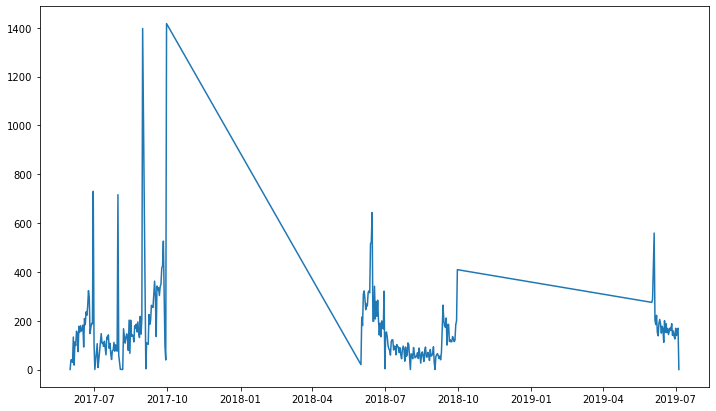

In [178]:
plt.figure(figsize=(12,7))
#df_mon_610_pv[[1]].plot(linewidth=1, fontsize=20)
plt.plot(df_mon_610_pv[[1]])
plt.show()

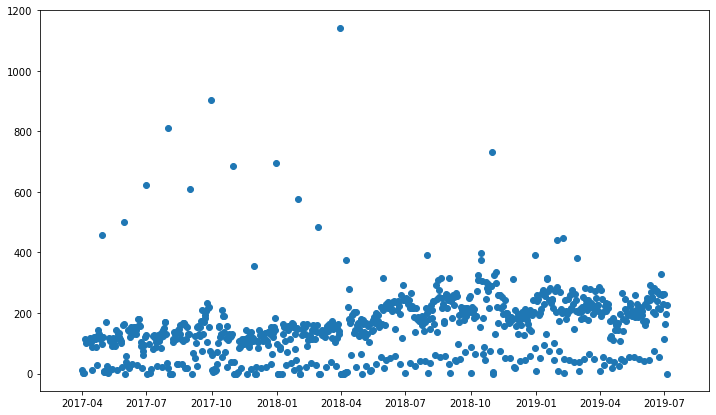

branch_id          5.0
count       806.000000
mean        155.548387
std         109.573649
min           0.000000
25%          93.250000
50%         153.000000
75%         212.000000
max        1143.000000


In [233]:
plt.figure(figsize=(12,7))
plt.scatter(df_seg_1_piv.index,df_seg_1_piv[[5]])
plt.show()
print(df_seg_1_piv[[5]].describe())

In [192]:
#itendifing outlier and replace by max value under Z score range
from scipy import stats
z = np.abs(stats.zscore(df_seg_1_piv[[5]]))
print(z)

[[1.32914038e+00]
 [1.41132792e+00]
 [1.41132792e+00]
 [3.88549681e-01]
 [4.89001115e-01]
 [4.70737218e-01]
 [3.52021887e-01]
 [4.61605269e-01]
 [6.35112291e-01]
 [1.32914038e+00]
 [3.88549681e-01]
 [3.06362144e-01]
 [3.88549681e-01]
 [3.88549681e-01]
 [6.16848394e-01]
 [2.78966299e-01]
 [1.16476531e+00]
 [1.14591225e-01]
 [3.06362144e-01]
 [2.42438505e-01]
 [3.79417732e-01]
 [3.61153835e-01]
 [5.34660857e-01]
 [2.75284061e+00]
 [3.06362144e-01]
 [1.35653623e+00]
 [1.38393207e+00]
 [1.38393207e+00]
 [1.31971385e-01]
 [1.19216115e+00]
 [1.40219597e+00]
 [1.34740428e+00]
 [3.52021887e-01]
 [4.43341372e-01]
 [4.15945527e-01]
 [5.80320600e-01]
 [1.28348064e+00]
 [3.61153835e-01]
 [3.79417732e-01]
 [5.07265012e-01]
 [5.80320600e-01]
 [9.63273280e-02]
 [3.42889938e-01]
 [1.31087648e+00]
 [2.33306556e-01]
 [3.33757990e-01]
 [1.96778762e-01]
 [3.70285784e-01]
 [4.89001115e-01]
 [4.52473321e-01]
 [1.21042505e+00]
 [3.15199514e-02]
 [5.89157970e-02]
 [3.16377830e+00]
 [1.42045986e+00]
 [8.999387

In [193]:
threshold = 3
print(np.where(z > 3))

(array([ 53,  83, 110, 140, 166, 197, 258, 288, 344, 558], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [234]:
temp_df = df_seg_1_piv[[5]][(z < 3).all(axis=1)]
print(temp_df.describe())
df_seg_1_piv.iloc[558,5]
z[557]

branch_id         5.0
count      796.000000
mean       148.354271
std         87.106572
min          0.000000
25%         92.000000
50%        152.000000
75%        210.000000
max        484.000000


array([1.20954131])

In [252]:
temp_df_1=df_seg_1_piv[[5]].replace(lambda x: temp_df.max() if z > 3)

SyntaxError: invalid syntax (<ipython-input-252-9c441e04c8ea>, line 1)

(796, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 796 entries, 2017-04-01 to 2019-07-05
Data columns (total 1 columns):
5.0    796 non-null float64
dtypes: float64(1)
memory usage: 12.4 KB
None


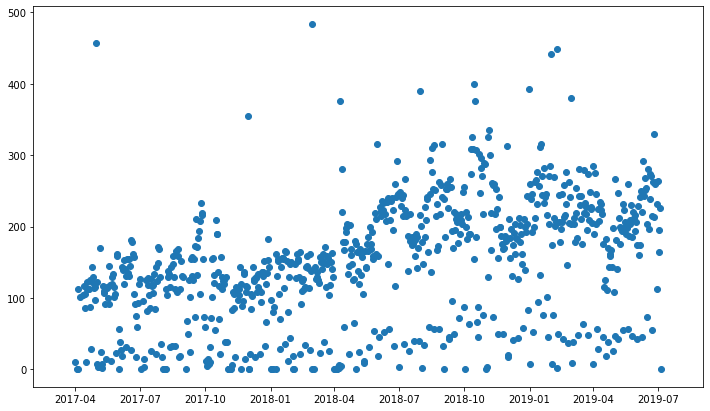

In [206]:
print(temp_df.shape)
print(temp_df.info())
plt.figure(figsize=(12,7))
plt.scatter(temp_df.index,temp_df)
plt.show()